<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Mean-Shift-clustering-in-scikit-learn" data-toc-modified-id="Mean-Shift-clustering-in-scikit-learn-0.1">Mean Shift clustering in scikit-learn</a></span></li></ul></li><li><span><a href="#Toy-dataset" data-toc-modified-id="Toy-dataset-1">Toy dataset</a></span></li><li><span><a href="#Iris-dataset" data-toc-modified-id="Iris-dataset-2">Iris dataset</a></span></li></ul></div>

<center><h2>Mean Shift clustering in scikit-learn</h2></center>

In [1]:
reset -fs

In [2]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

palette = "Dark2"
%matplotlib inline

In [3]:
from sklearn.cluster import MeanShift

# MeanShift?

# Toy dataset

In [4]:
X = np.array([[1, 1], [2, 1], [1, 0],
               [4, 7], [3, 5], [3, 6]])
clustering = MeanShift(bandwidth=2).fit(X)
clustering.labels_

array([1, 1, 1, 0, 0, 0])

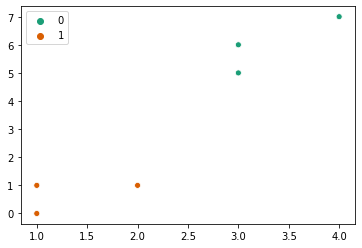

In [5]:
scatter = sns.scatterplot(x=X[:, 0],
                          y=X[:, 1],
                          hue=clustering.labels_,#'hue' will color code each group
                          palette=palette,
                         );

# Iris dataset

In [6]:
from sklearn.datasets import load_iris

iris = load_iris()
X, _ = load_iris(return_X_y=True) # Ingore labels

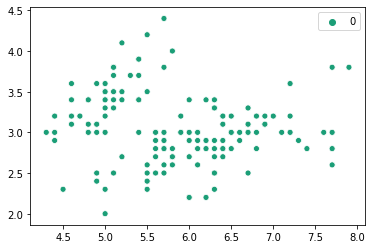

In [7]:
# MeanShift clustering
clustering = MeanShift(bandwidth=10) # TODO: Try different bandwidths
clustering.fit(X) 

scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_, palette=palette,);

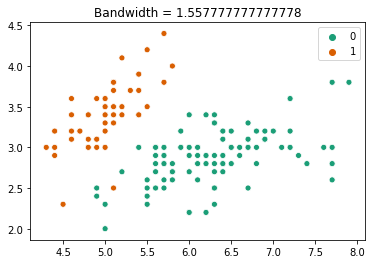

<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [10]:
# A solution
for bandwidth in np.linspace(.01, 2, 10):
    clustering = MeanShift(bandwidth=bandwidth) 
    clustering.fit(X) 

    scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_, palette=palette,);
    plt.title(f"Bandwidth = {bandwidth}")
    plt.show();
    display.display(plt.gcf());
    input('Press return to see next figure: ')
    display.clear_output(wait=True)

__Question__: How does the number of clusters change with bandwidth size?

__Answer__: MeanShift's bandwidth controls the number of clusters

Number of clusters: 2


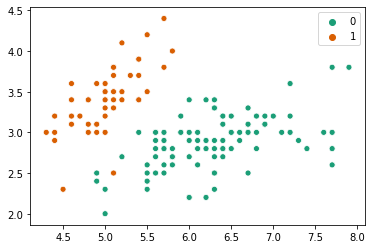

In [11]:
X, _ = load_iris(return_X_y=True)
clustering = MeanShift() # When no bandwidth is passed, MeanShift estimates bandwidth
clustering.fit(X) 
print(f"Number of clusters: {clustering.cluster_centers_.shape[0]}")
scatter = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=clustering.labels_, palette=palette,);

__Question__: How does this compare to the actual number of Iris classes?

__Answer__: MeanShift's estimates Iris dataset to be 2 clusters. The actual number of classes is 3.